<a href="https://colab.research.google.com/github/fgassuncao/MO412/blob/main/Assignement_10/Assigment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx #imports networkX stuff
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/data_MO412/10/"

In [4]:
df_links = pd.read_csv(f"{path}links.csv",header=None)

In [5]:
df_links

,0,1
0,7,13
1,13,12
2,5,7
3,7,5
4,12,6
5,11,12
6,6,1
7,5,9
8,5,1
9,1,3


In [6]:
df_nodes = pd.read_csv(f"{path}nodes.csv",header=None)

In [7]:
df_nodes

,0,1
0,1,Cyclops
1,2,Beast
2,3,Angel
3,4,Iceman
4,5,Storm
5,6,Colossus
6,7,Rogue
7,8,Gambit
8,9,Havok
9,10,Dazzler


In [8]:
G=nx.from_pandas_edgelist(df_links.iloc[:,:2], 0, 1, create_using=nx.DiGraph)

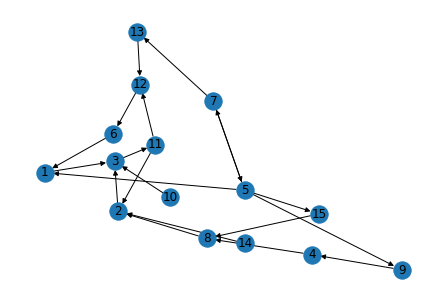

In [9]:
nx.draw(G,with_labels=True)

In [10]:
G.edges(15)

OutEdgeDataView([(15, 8)])

In [11]:
SCC = nx.strongly_connected_components(G)

In [12]:
str(df_nodes[1][df_nodes[0]==1].values[0])

'Cyclops'

In [13]:
count = 0
for component in SCC:
  print(component)
  for node in component:
    G.nodes[node]["component"] = count
    G.nodes[node]["name"] = str(df_nodes[1][df_nodes[0]==node].values[0])
  count +=1
    

{1, 2, 3, 6, 11, 12}
{13}
{8}
{4}
{9}
{15}
{5, 7}
{10}
{14}


In [14]:
print(G.nodes)
for g in G.nodes:
  print(G.nodes[g])

[7, 13, 12, 5, 6, 11, 1, 9, 3, 2, 10, 4, 8, 14, 15]
{'component': 6, 'name': 'Rogue'}
{'component': 1, 'name': 'Banshee'}
{'component': 0, 'name': 'Forge'}
{'component': 6, 'name': 'Storm'}
{'component': 0, 'name': 'Colossus'}
{'component': 0, 'name': 'Polaris'}
{'component': 0, 'name': 'Cyclops'}
{'component': 4, 'name': 'Havok'}
{'component': 0, 'name': 'Angel'}
{'component': 0, 'name': 'Beast'}
{'component': 7, 'name': 'Dazzler'}
{'component': 3, 'name': 'Iceman'}
{'component': 2, 'name': 'Gambit'}
{'component': 8, 'name': 'Psylocke'}
{'component': 5, 'name': 'Jubilee'}


In [15]:
nx.write_gexf( G , path+"network.gexf")